In [1]:
from pandas_datareader import data as web
import yfinance as yf
import pandas as pd
import numpy as np
from openpyxl import Workbook
import xlsxwriter
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import csv
import plotly.graph_objects as go

# Percentual em relação a Abertura do dia anterior

In [2]:
codigos = pd.read_excel('selecao.xlsx')
codigos['Simbol']=codigos['codigo']+'.SA'
#simbolos = codigos.to_dict()

#valores = simbolos.values()

lista = codigos.values.tolist()
lista

lista_ativos = {}
for i in range(len(lista)):
    lista_ativos[lista[i][0]] = lista[i][1]

lista_ativos.values()

dict_values(['AALL34.SA', 'AALR3.SA', 'ABCB4.SA', 'ABEV3.SA', 'AGRO3.SA', 'ALPA4.SA', 'ALSC3.SA', 'ALUP11.SA', 'AMAR3.SA', 'AMZO34.SA', 'ANIM3.SA', 'ARZZ3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBRK3.SA', 'BBSE3.SA', 'BEEF3.SA', 'BKBR3.SA', 'BOEI34.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BRPR3.SA', 'BRSR6.SA', 'BTOW3.SA', 'BVMF3.SA', 'CAML3.SA', 'CARD3.SA', 'CCRO3.SA', 'CESP6.SA', 'CGAS3.SA', 'CGAS5.SA', 'CIEL3.SA', 'CMIG3.SA', 'CMIG4.SA', 'CPFE3.SA', 'CPLE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSMG3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'CZLT33.SA', 'DIRR3.SA', 'DTEX3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'ELPL3.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'ENMT4.SA', 'EQTL3.SA', 'ESTC3.SA', 'ETER3.SA', 'EUCA4.SA', 'EVEN3.SA', 'EZTC3.SA', 'FESA4.SA', 'FIBR3.SA', 'FLRY3.SA', 'FRAS3.SA', 'GBIO33.SA', 'GFSA3.SA', 'GGBR3.SA', 'GGBR4.SA', 'GOAU3.SA', 'GOAU4.SA', 'GOLL4.SA', 'GRND3.SA', 'GUAR3.

In [3]:
ativo = yf.Ticker("EGIE3.SA")

data_atual = datetime.now().strftime('%Y-%m-%d')
cotacoes = ativo.history(start = '2022-01-01', end = data_atual)

#cotacoes



In [4]:
df = pd.DataFrame()
df.index = cotacoes.index
df['Abertura']=cotacoes['Open']
df['Fechamento']=cotacoes['Close']
df['Máxima']=cotacoes['High']
df['Mínima']=cotacoes['Low']
df['Volume']=cotacoes['Volume']
df['Atual'] = cotacoes['Close'] - cotacoes['Open'] 
df['A1'] = cotacoes['Close'].shift(1) - cotacoes['Open'].shift(1) 
df['A2'] = cotacoes['Close'].shift(2) - cotacoes['Open'].shift(2) 

In [5]:
df1 = pd.DataFrame()
df1.index = cotacoes.index
df1['Open']=cotacoes['Open']
df1['Close']=cotacoes['Close']
df1['High']=cotacoes['High']
df1['Low']=cotacoes['Low']
df1['Volume']=cotacoes['Volume']
df1['Atual'] = cotacoes['Close'] - cotacoes['Open'] 
df1['A1'] = cotacoes['Close'].shift(1) - cotacoes['Open'].shift(1) 
df1['A2'] = cotacoes['Close'].shift(2) - cotacoes['Open'].shift(2) 

In [6]:
#Tratamento dos arquivos

#df = pd.read_csv('ALPA4_DIARIO.csv',encoding='latin1', sep = ',')

#df['Abertura']=df['Abertura'].str.replace(',','.')
#df['Fechamento']=df['Fechamento'].str.replace(',','.')
#df['Máxima']=df['Máxima'].str.replace(',','.')
#df['Mínima']=df['Mínima'].str.replace(',','.')
#df['ULT']=df['ULT'].str.replace(',','.')

#df.to_excel('ALPA4_DIARIO.xlsx')

In [7]:
df

,Abertura,Fechamento,Máxima,Mínima,Volume,Atual,A1,A2
Date,,,,,,,,
2022-01-03 00:00:00-03:00,31.685286,31.306709,31.989793,31.117421,1133700,-0.378577,NaN,NaN
2022-01-04 00:00:00-03:00,31.306713,31.389011,31.570071,31.150342,1209200,0.082298,-0.378577,NaN
2022-01-05 00:00:00-03:00,31.380777,30.944588,31.463075,30.944588,1027600,-0.436189,0.082298,-0.378577
2022-01-06 00:00:00-03:00,31.010437,30.697699,31.207954,30.697699,1000600,-0.312739,-0.436189,0.082298
2022-01-07 00:00:00-03:00,30.689464,30.738842,31.133882,30.549554,1234100,0.049378,-0.312739,-0.436189
...,...,...,...,...,...,...,...,...
2024-08-15 00:00:00-03:00,45.165700,44.775414,45.175455,44.658329,805600,-0.390286,0.517126,0.029274
2024-08-16 00:00:00-03:00,45.155941,45.068127,45.331569,44.726629,1192000,-0.087814,-0.390286,0.517126
2024-08-19 00:00:00-03:00,45.243753,45.526711,45.760883,44.980311,896900,0.282957,-0.087814,-0.390286


In [8]:
Var_Fechamento = df['Fechamento']/df['Fechamento'].shift(1) - 1
Var_Abertura = df['Abertura']/df['Fechamento'].shift(1) - 1 
Var_Maxima = df['Máxima']/df['Fechamento'].shift(1) - 1
Var_Minima = df['Mínima']/df['Fechamento'].shift(1) - 1

In [9]:
df1 = pd.DataFrame()
df1['Abertura'] = Var_Abertura
df1['Fechamento'] = Var_Fechamento
df1['Maxima'] = Var_Maxima
df1['Mínima'] = Var_Minima

In [10]:
#fig, ax = plt.subplots(4, 1, sharex = True, figsize = (10,20))

#ax[0].plot(df1['Abertura'].tail(20), color = 'red')
#ax[1].plot(df1['Fechamento'].tail(20))
#ax[2].plot(df1['Maxima'].tail(20), color = 'green')
#ax[3].plot(df1['Mínima'].tail(20), color = 'black')

#### Contador = 0 (Condição de entrada (Compra na baixa))
#### Contador = 1 (Condição de entrada (Venda na alta))
#### Contador = 2 (Condição de entrada (Venda na baixa))
#### Contador = -2 (Condição de entrada (Compra na alta))

## Estratégia

In [11]:
 
# Operações do tipo compra: Valor < 0
# Operações do tipo venda: Valor > 0

contador = 0
valor = 0.02
bet_size = 1000


listadetrades = []
#coma = df1.iterrows()
coma = df.tail(250).iterrows()

for idx, row in coma:
    entrada_comprada = row['Abertura'] - (row['Abertura']*valor)
    entrada_vendida = row['Abertura'] + (row['Abertura']*valor)
    entrada_comprada1 = row['Abertura'] + (row['Abertura']*valor)
    entrada_vendida1 = row['Abertura'] - (row['Abertura']*valor)
    
    if contador == 0:
    #Condição de entrada
        if ((entrada_comprada - row['Mínima']) >= 0) & (row['A1']<0):
            resultado = (row['Fechamento']-entrada_comprada)*bet_size
            listadetrades += [{'price':row['Fechamento'], 
                           'time': idx, 
                           'kind':'buy', 
                           'quantidade': bet_size, 
                           'Resultado': resultado, 
                           'Entrada':entrada_comprada,
                            'Ajuste': row['A1']}]
    elif contador == 1: 
        if (entrada_vendida <= row['Máxima']) & (row['A1']>0):
            resultado = (entrada_vendida - row['Fechamento'])*bet_size
            stoploss = row['Máxima'] - entrada_vendida
            vol = row['Máxima'] - row['Mínima']
            listadetrades += [{'price':row['Fechamento'], 
                           'time': idx, 
                           'kind':'sell', 
                           'quantidade': bet_size, 
                           'Resultado': resultado, 
                           'Entrada': entrada_vendida,
                            'Ajuste': row['A1']}]
    if contador == 2:
    #Condição de entrada (Venda na queda)
        if ((entrada_vendida1 - row['Mínima']) >= 0) & (row['A1']<0):
            resultado = (entrada_vendida1 - row['Fechamento'])*bet_size
            listadetrades += [{'price':row['Fechamento'], 
                           'time': idx, 
                           'kind':'sell', 
                           'quantidade': bet_size, 
                           'Resultado': resultado, 
                           'Entrada':entrada_vendida1,
                            'Ajuste': row['A1']}]
    elif contador == -2: 
        #Condição de entrada (Compra na alta)
        if (entrada_comprada1 - row['Máxima']) <= 0:
            resultado = (row['Fechamento']-entrada_comprada1)*bet_size
            listadetrades += [{'price':row['Fechamento'], 
                           'time': idx, 
                           'kind':'buy', 
                           'quantidade': bet_size, 
                           'Resultado': resultado, 
                           'Entrada': entrada_comprada1,
                            'Ajuste': row['A1']}]
       
    df_trades_raw = pd.DataFrame(listadetrades)


In [12]:
df_trades1 = df_trades_raw

In [13]:
df_trades1

,price,time,kind,quantidade,Resultado,Entrada,Ajuste
0,39.554104,2023-09-26 00:00:00-03:00,buy,1000,189.461380,39.364642,-0.340004
1,38.770203,2023-09-27 00:00:00-03:00,buy,1000,7.176209,38.763026,-0.613899
2,38.308949,2024-01-29 00:00:00-03:00,buy,1000,115.688299,38.193260,-0.369813
3,44.492455,2024-07-19 00:00:00-03:00,buy,1000,306.568020,44.185887,-0.595185
4,43.263062,2024-07-24 00:00:00-03:00,buy,1000,-81.375966,43.344437,-0.175628


In [14]:
df_trades_raw['Resultado'].sum()

537.5179417985835

### ------------------------------------------------------

# Pior dia

In [15]:
df_trades_raw['Resultado'].min()

-81.37596639398481

### ------------------------------------------------------
# Melhor dia

In [16]:
df_trades_raw['Resultado'].max()

306.56801995651506

### ------------------------------------------------------

# Ganho médio

In [17]:
ganho_medio = pd.DataFrame()

ganho_medio['Ganho Médio'] = (df_trades_raw['Resultado']/(df_trades_raw['price']*10))

valor = ganho_medio['Ganho Médio'].mean()

print(round(valor*100,2),'% ao dia')


26.01 % ao dia


### ------------------------------------------------------

# Dados percentuais

In [18]:
x = ((df_trades1['Resultado']>0) == True).sum()
y = ((df_trades1['Resultado']>0) == False).sum()

In [19]:
# Contando os gains e Loss
gain = round((x/(x+y))*100,2)
loss = round((y/(x+y))*100,2)
print('Seu percentual de acerto é: {}%'.format(gain))
print('Seu percentual de erro é: {}%'.format(loss))

Seu percentual de acerto é: 80.0%
Seu percentual de erro é: 20.0%


In [20]:
df_trades1['Position'] = df_trades1['quantidade'].fillna(0).cumsum()

In [21]:
df_trades1['kind'].value_counts()

kind
buy    5
Name: count, dtype: int64

### ------------------------------------------------------

## Avaliando a estratéia

In [22]:
#df_trades1['ret_mercado'] = df_trades1['<CLOSE>']-df_trades1['<CLOSE>'].shift(1)
#df_trades1['ret_mercado'] = df_trades1['Resultado']
#df_trades1['ret'] = df_trades1['ret_mercado']*df_trades1['Position']
#df_trades1['ret_acumulado'] = df_trades1['ret'].cumsum()
df_trades1['ret_acumulado']=df_trades1['Resultado'].cumsum()

<Axes: >

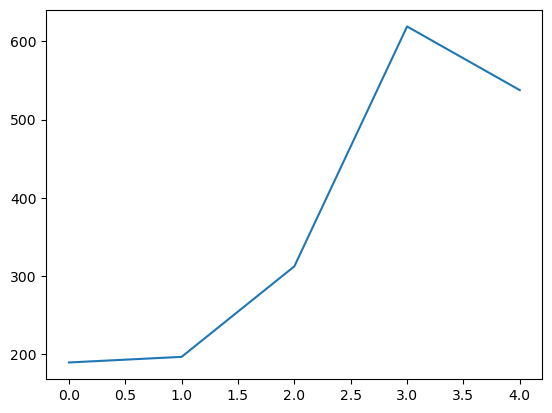

In [23]:
df_trades1['ret_acumulado'].plot()

## ----------------------------------------
##  Otimização de Parâmetros 
## ----------------------------------------

# Drawdown

In [24]:
capital_inicial = 100

df_trades1['ret_acumulado'] += capital_inicial

In [25]:
lucro = (df_trades1['Resultado'].sum())

<Axes: >

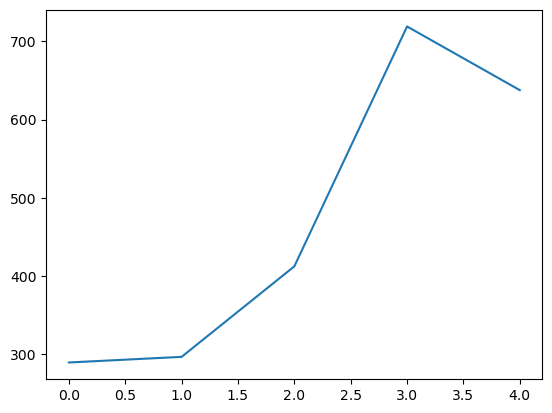

In [26]:
df_trades1['ret_acumulado'].plot()

In [27]:
# Calculando o valor máximo
df_trades1['max_cum'] = df_trades1['ret_acumulado'].cummax()
df_trades1['min_cum'] = df_trades1['ret_acumulado'].cummin()

In [28]:
# Calculando drawdown
draw = df_trades1['drawdown'] = df_trades1['ret_acumulado']/df_trades1['max_cum'] - 1
draw.min()

-0.11319607172437851

In [29]:
# Calculando ganho máximo perda máxima
ganho_max0 = df_trades1['Resultado'].max()/capital_inicial
ganho_max = round(ganho_max0*100,2)

perda_max0 = df_trades1['Resultado'].min()/capital_inicial
perda_max = round(perda_max0*100,2)

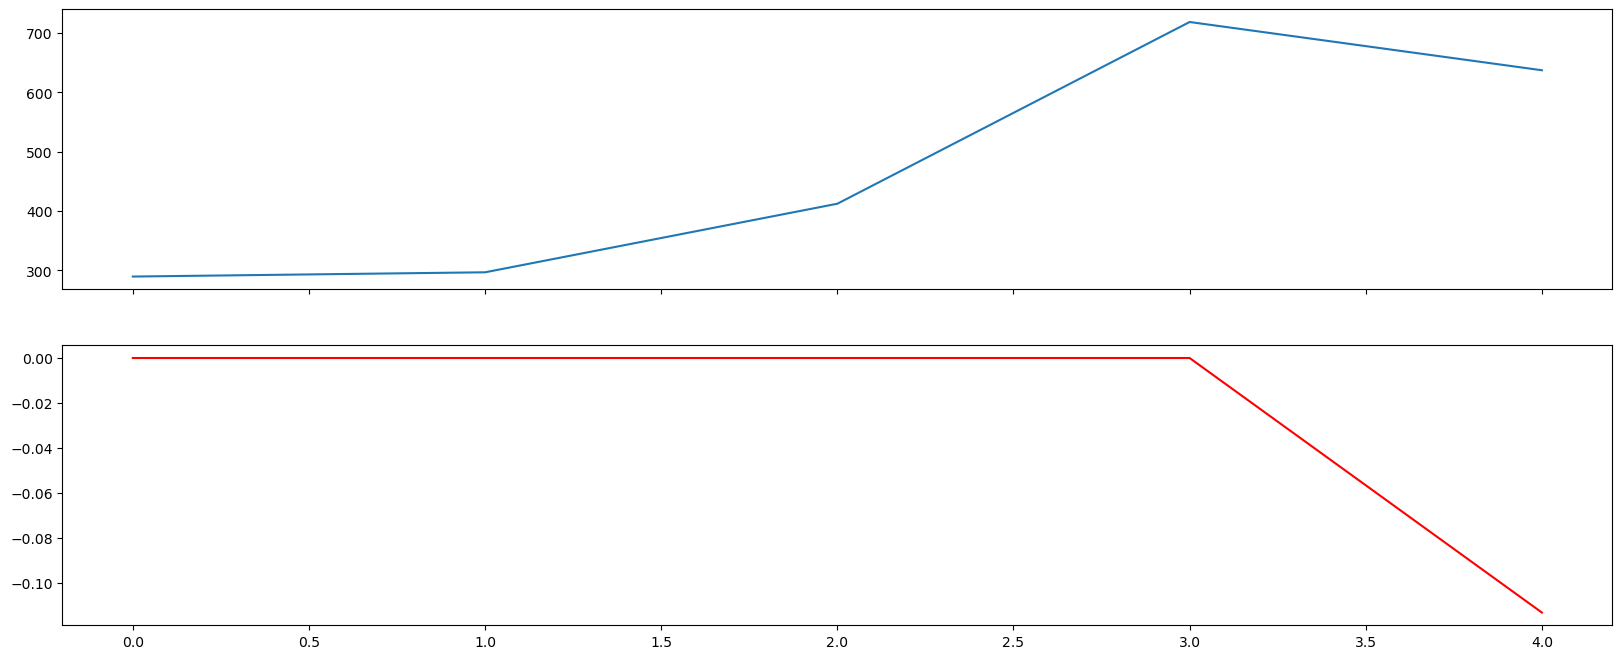

In [30]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (20,8))

ax[0].plot(df_trades1['ret_acumulado'])
ax[1].plot(df_trades1['drawdown'], color = 'red')


## ----------------------------------------

# Underwater period

In [31]:
# Calculando o periodo de drawdown
df_trades1['underwater'] = df_trades1['ret_acumulado'] < df_trades1['max_cum']

In [32]:
df_trades1['underwater'].sum()/8

0.125

## ----------------------------------------

# Índice Sharpe

In [33]:
df_trades1['Resultado'].groupby(df_trades1.index).sum().mean()/df_trades1['Resultado'].groupby(df_trades1.index).sum().std()

0.7082736377354557

## ----------------------------------------

# Resumo operacional

In [34]:
capital_final = round(capital_inicial+lucro,2)

In [35]:
def resumo():  
    Resultado = round((lucro/capital_inicial)*100,2)
    print('Operação do tipo {}'.format(listadetrades[0]['kind']))
    print('Seu percentual de acerto é: {} %'.format(gain))
    print('Seu percentual de erro é: {} %'.format(loss))
    print('Seu ganho máximo foi de: {} % do capital inicial.'.format(ganho_max))
    print('Sua perda máxima foi de: {} % do capital inicial.'.format(perda_max))
    print('')
    print('Seu resultado final foi de: {} % do capital inicial.'.format(Resultado))
    print('')
    print('Capital inicial: R${}'.format(capital_inicial) + ' ' + 'Capital final: R${}'.format(capital_final))

In [36]:
resumo()

Operação do tipo buy
Seu percentual de acerto é: 80.0 %
Seu percentual de erro é: 20.0 %
Seu ganho máximo foi de: 306.57 % do capital inicial.
Sua perda máxima foi de: -81.38 % do capital inicial.

Seu resultado final foi de: 537.52 % do capital inicial.

Capital inicial: R$100 Capital final: R$637.52
